In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'random_mas_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og = FigureLibrary(galfile, 'pk')
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

path = base + 'lowgr_tng100B_099S_0A_800R/results/'
galfile = pkl.load(open(path + 'galaxygrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hifile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
gxhfile = pkl.load(open(path + 'hisubhaloXgalaxy_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
flib_og.addResults(galfile)
flib_og.addResults(hifile)
flib_og.addResults(gxhfile)

# HISUBHALO

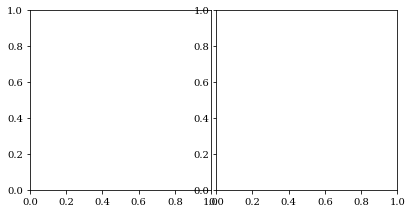

In [3]:
flib = copy.copy(flib_og)
flib.createFigGrid(1,2, panel_length = 2.5)
fig, panels = flib.getFig()

In [4]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'hisubhalo'
ip['HI_res'] = 'diemer'
rmp['fieldname'] = 'galaxy'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'mas', rmp)
dim = flib.getDim()
# for i in range(dim[0]):
#     for j in range(dim[1]):
#         idx = (i, j)
#         results = figarr[idx]
#         for r in results:
#             print(r.props['space'])

In [5]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotFill(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':'olive', 'label':'Shuffled'})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':'orange', 'label':'CICW'})

In [6]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'center right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

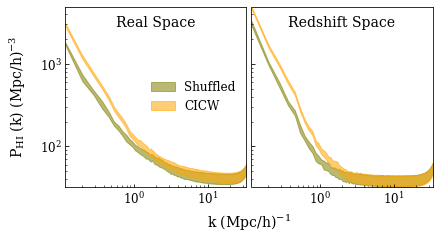

In [7]:
fig

# GALAXY

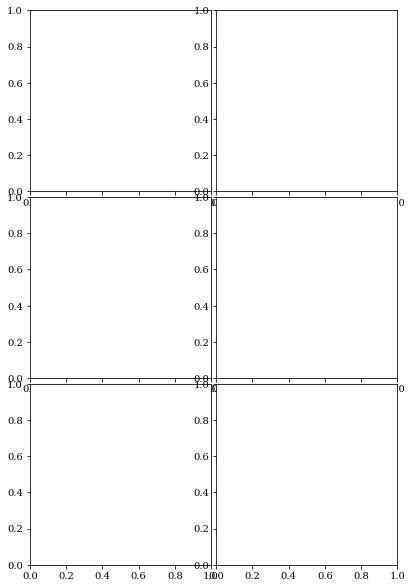

In [8]:
flib = copy.copy(flib_og)
flib.createFigGrid(3, 2, panel_length = 2.5)
fig, panels = flib.getFig()

In [9]:
ip = {}; rmp = {}
ip['is_auto'] = True
ip['fieldname'] = 'galaxy'
ip['gal_res'] = 'diemer'
ip['color_cut'] = ['0.60', 'None']
ip['species'] = 'stmass'
rmp['fieldname'] = 'hisubhalo'
figarr = flib.arrangeResults(ip, 'color', ['resolved', 'blue', 'red'], 'space', ['real', 'redshift'], 'mas', rmp)
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        results = figarr[idx]
        for r in results:
            print(r.props['mas'])

rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW
rCICW
CICW


In [10]:
colors = ['gray', 'blue', 'red']
# labels = ['All Galaxies', 'Blue Galaxies', 'Red Galaxies']
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        
        flib.plotLine(idx, {'mas':'rCICW'},
                     fill_kwargs = {'color':colors[i], 'label':'Shuffled', 'linestyle':'--'})
        flib.plotFill(idx, {'mas':'CICW'},
                     fill_kwargs = {'color':colors[i], 'label':'CICW'})

In [11]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams({'labelsize':12})

# labels
colkw = {'fontsize':14}
legkw = {'fontsize':12, 'loc':'center right'}
# flib.colLabels(['Real Space', 'Redshift Space'])
axiskw = {'fontsize':14}
xpos = [0.5, flib.yborder[0]/2/flib.figsize[1]]
ypos = [flib.xborder[0]/3/flib.figsize[0], 0.5]
flib.colLabels(['Real Space', 'Redshift Space'], txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x', pos = xpos, txt_kwargs = axiskw)
axiskw['rotation'] = 'vertical'
flib.axisLabel('y', pos = ypos, subscript = '\\rm{HI}', txt_kwargs = axiskw)

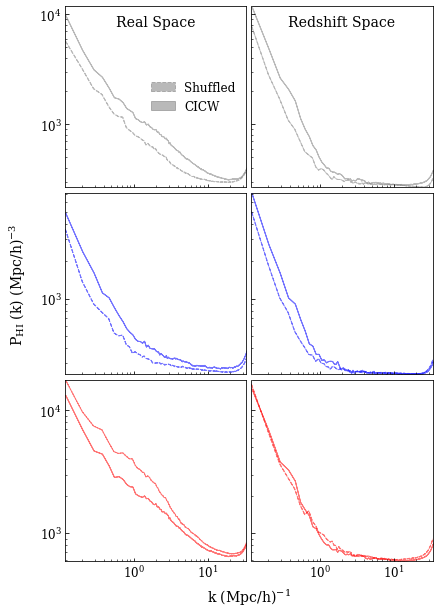

In [12]:
fig